In [373]:
import mlrose
import numpy as np
import matplotlib.pyplot as plt
import time

In [374]:
def non_attacking(state):
    grid=[[0,0,0,0,0,0,0,0],
          [0,0,0,0,0,0,0,0],
          [0,0,0,0,0,0,0,0],
          [0,0,0,0,0,0,0,0],
          [0,0,0,0,0,0,0,0],
          [0,0,0,0,0,0,0,0],
          [0,0,0,0,0,0,0,0],
          [0,0,0,0,0,0,0,0]]
    for i in range(len(state)):
        grid[i][state[i]] = 1
    grid = attacking(grid)
    cnt = 0
    for i in range(len(grid)):
        for j in range(len(grid)):
            if grid[i][j] == 1:
                cnt +=1
    return cnt

In [375]:
def queens_max(state):
   # Initialize counter
    fitness_cnt = 0
    # For all pairs of queens
    for i in range(len(state) - 1):
        for j in range(i + 1, len(state)):
                # Check for horizontal, diagonal-up and diagonal-down attacks
            if (state[j] != state[i]) and (state[j] != state[i] + (j - i)) and (state[j] != state[i] - (j - i)):

                   # If no attacks, then increment counter
                fitness_cnt += 1

    return fitness_cnt

# Initialize custom fitness function object
fitness = mlrose.CustomFitness(queens_max)

In [376]:
def plot_best_state(best_state):
    grid=[[0,0,0,0,0,0,0,0],
          [0,0,0,0,0,0,0,0],
          [0,0,0,0,0,0,0,0],
          [0,0,0,0,0,0,0,0],
          [0,0,0,0,0,0,0,0],
          [0,0,0,0,0,0,0,0],
          [0,0,0,0,0,0,0,0],
          [0,0,0,0,0,0,0,0]]
    for i in range(len(best_state)):
        grid[i][best_state[i]] = 1
    grid = attacking(grid)
    plot(grid)
    return(grid, x,y)

In [377]:
def plot(grid):# Plot the solution on a chessboard
    import seaborn as sns
    import matplotlib.pyplot as plt
    import string
    
    l=len(grid)
    Ly=list(range(1,l+1))[::-1]
    ly = [str(i) for i in Ly]
    Lx=list(string.ascii_uppercase)
    lx=Lx[:l]
    
    plt.close('all')
    sns.set(font_scale = 2)
    plt.figure(figsize=(10,10))
    ax = plt.gca() #you first need to get the axis handle
    ax.set_aspect(1)
    sns.heatmap(grid,linewidths=.8,cbar=False,linecolor='blue',
                cmap='winter',center=0.4,xticklabels=lx,yticklabels=ly)

In [378]:
def attacking(grid):
    for row in grid:
        counter = 0
        for i in row:
            if i == 1:
                counter+=1
        if counter > 1:
            row = [2 for x in row if x==1]
    for i in range(len(grid)):
        counter = 0
        for j in range(len(grid)):
            if grid[j][i] > 0:
                counter+=1
        if counter > 1:
            for j in range(len(grid)):
                if grid[j][i] > 0:
                    grid[j][i] = 2
    column_dict = {0:0,1:1,2:2,3:3,4:4,5:5,6:6,7:7}
    row_dict = {0:7,1:6,2:5,3:4,4:3,5:2,6:1,7:0}
    sum_dict = {}
    for i in range(len(grid)):
        for j in range(len(grid)):
            if grid[i][j] > 0:
                if column_dict[i]+row_dict[j] not in sum_dict:
                    sum_dict[column_dict[i]+row_dict[j]]=[(i,j)]
                else:
                    sum_dict[column_dict[i]+row_dict[j]].append((i,j))
    for k, v in sum_dict.items():
        if len(v) > 1:
            for item in v:
                grid[item[0]][item[1]] = 2
    column_dict = {0:0,1:1,2:2,3:3,4:4,5:5,6:6,7:7}
    row_dict = {0:0,1:1,2:2,3:3,4:4,5:5,6:6,7:7}
    sum_dict = {}
    for i in range(len(grid)):
        for j in range(len(grid)):
            if grid[i][j] > 0:
                if column_dict[i]+row_dict[j] not in sum_dict:
                    sum_dict[column_dict[i]+row_dict[j]]=[(i,j)]
                else:
                    sum_dict[column_dict[i]+row_dict[j]].append((i,j))
    for k, v in sum_dict.items():
        if len(v) > 1:
            for item in v:
                grid[item[0]][item[1]] = 2                
    return grid

In [379]:
problem = mlrose.DiscreteOpt(length = 8, fitness_fn = fitness, maximize = True, max_val = 8)

In [380]:
# Define decay schedule
schedule = mlrose.ExpDecay()

# Define initial state
init_state = np.array([0, 1, 2, 3, 4, 5, 6, 7])

# Solve problem using simulated annealing
start = time.time()
best_state, best_fitness, fitness_curve = mlrose.simulated_annealing(problem, schedule = schedule,
                                                      max_attempts = 10, max_iters = 1000,
                                                      init_state = init_state, random_state = 7,
                                                      curve=True)
end = time.time()
print('Elapsed Time: {} s'.format(end-start))

print(best_state)
print(best_fitness)
print(non_attacking(best_state))

Elapsed Time: 0.02688741683959961 s
[4 0 7 5 1 6 2 7]
26.0
4


Text(0.5, 1.03, 'Fitness Curve for Randomized Optimization with Simulated Annealing: 8-Queens')

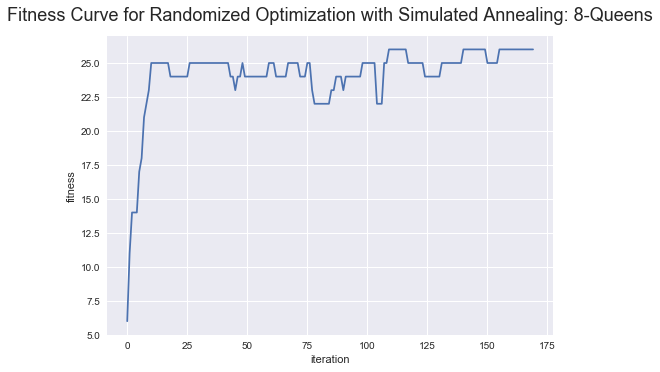

In [359]:
plt.style.use('seaborn')

plt.figure()
plt.plot(fitness_curve)
plt.xlabel('iteration')
plt.ylabel('fitness')
plt.title('Fitness Curve for Randomized Optimization with Simulated Annealing: 8-Queens', fontsize = 18, y = 1.03)

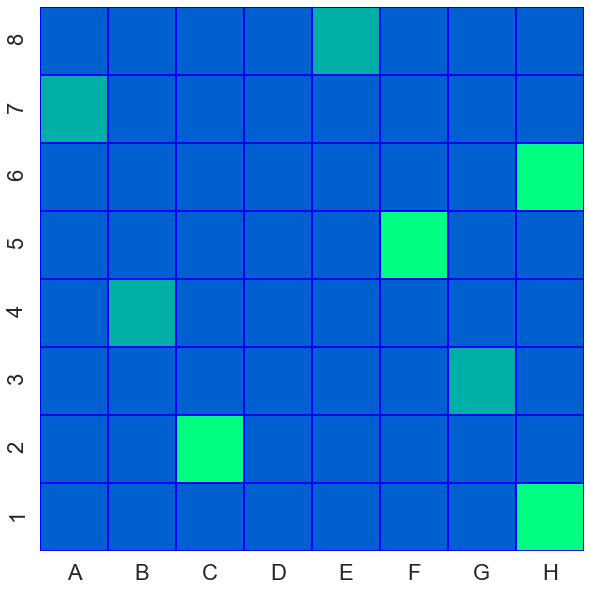

In [360]:
grid, x, y = plot_best_state(best_state)

In [361]:
# Define initial state
init_state = np.array([0, 1, 2, 3, 4, 5, 6, 7])

# Solve problem using random hill climb
start = time.time()
best_state, best_fitness, fitness_curve = mlrose.random_hill_climb(problem, restarts = 3,
                                                                  max_attempts = 10, max_iters = 1000,
                                                                  init_state = init_state, random_state = 42,
                                                                  curve=True)
end = time.time()
print('Elapsed Time: {} s'.format(end-start))

print(best_state)
print(best_fitness)
print(non_attacking(best_state))

Elapsed Time: 0.01794266700744629 s
[0 3 5 1 6 4 2 7]
25.0
3


Text(0.5, 1.03, 'Fitness Curve for Randomized Optimization with Random Hill Climb: 8-Queens')

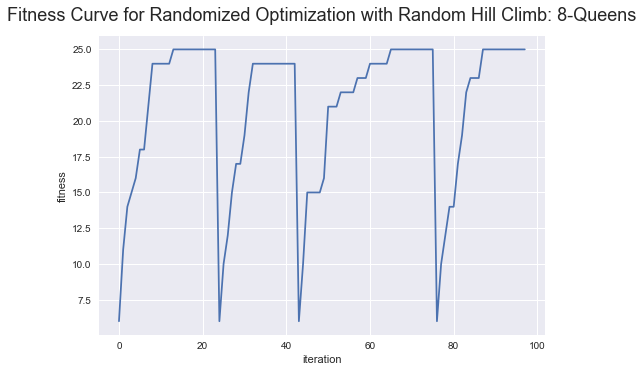

In [362]:
plt.style.use('seaborn')

plt.figure()
plt.plot(fitness_curve)
plt.xlabel('iteration')
plt.ylabel('fitness')
plt.title('Fitness Curve for Randomized Optimization with Random Hill Climb: 8-Queens', fontsize = 18, y = 1.03)

([[2, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 2, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 1, 0, 0],
  [0, 2, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 2, 0],
  [0, 0, 0, 0, 1, 0, 0, 0],
  [0, 0, 1, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 2]],
 [0, 1, 2, 3, 4, 5, 6, 7],
 [4, 0, 7, 5, 1, 6, 2, 7])

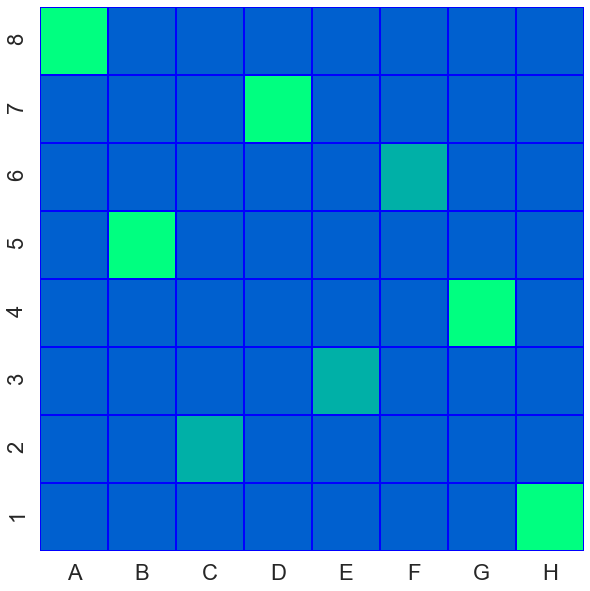

In [363]:
plot_best_state(best_state)

In [364]:
# Define initial state
init_state = np.array([0, 1, 2, 3, 4, 5, 6, 7])

# Solve problem using MIMIC
start = time.time()
best_state, best_fitness, fitness_curve = mlrose.mimic(problem, pop_size = 800, keep_pct = .2,
                                                        max_attempts = 10, max_iters = 1000,
                                                        random_state = 12,
                                                        curve=True)
end = time.time()
print('Elapsed Time: {} s'.format(end-start))

print(best_state)
print(best_fitness)
print(non_attacking(best_state))

Elapsed Time: 1.6103122234344482 s
[4 6 1 3 7 0 2 5]
28.0
8


Text(0.5, 1.03, 'Fitness Curve for Randomized Optimization with MIMIC: 8-Queens')

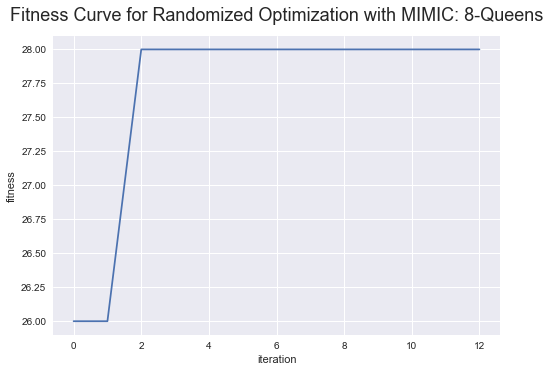

In [365]:
plt.style.use('seaborn')

plt.figure()
plt.plot(fitness_curve)
plt.xlabel('iteration')
plt.ylabel('fitness')
plt.title('Fitness Curve for Randomized Optimization with MIMIC: 8-Queens', fontsize = 18, y = 1.03)

([[0, 0, 0, 0, 1, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 1, 0],
  [0, 1, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 1, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 1],
  [1, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 1, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 1, 0, 0]],
 [0, 1, 2, 3, 4, 5, 6, 7],
 [4, 0, 7, 5, 1, 6, 2, 7])

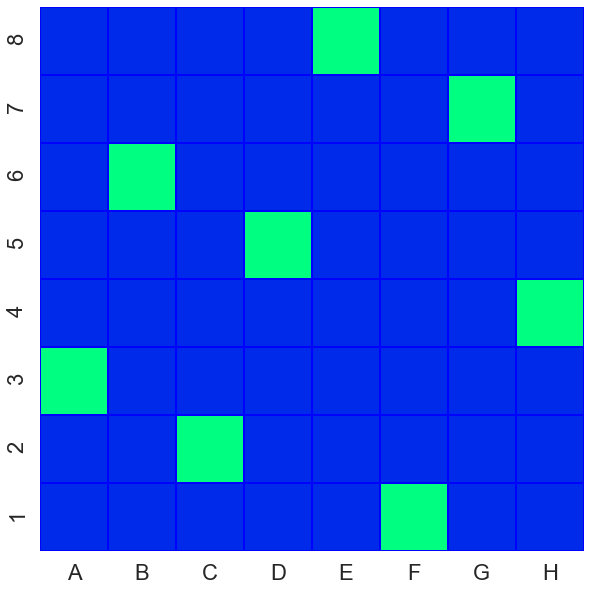

In [366]:
plot_best_state(best_state)

In [367]:
# Define initial state
init_state = np.array([0, 1, 2, 3, 4, 5, 6, 7])

# Solve problem using Genetic Algorithm
start = time.time()
best_state, best_fitness, fitness_curve = mlrose.genetic_alg(problem, pop_size = 1000, mutation_prob=0.1,
                                                        max_attempts = 10, max_iters = 1000,
                                                        random_state = 42,
                                                        curve=True)
end = time.time()
print('Elapsed Time: {} s'.format(end-start))

print(best_state)
print(best_fitness)
print(non_attacking(best_state))

Elapsed Time: 1.6032743453979492 s
[7 4 2 5 1 6 0 3]
27.0
6


Text(0.5, 1.03, 'Fitness Curve for Randomized Optimization with Genetic Algorithm: 8-Queens')

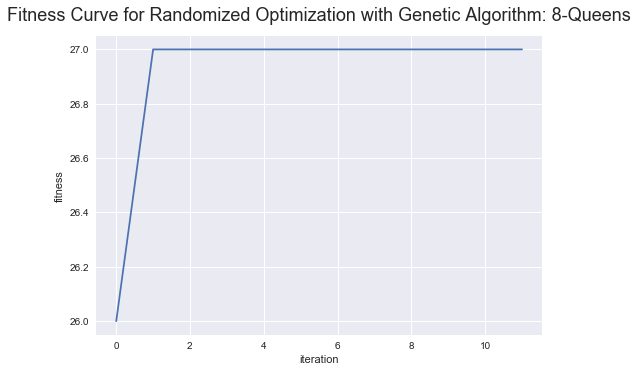

In [368]:
plt.style.use('seaborn')

plt.figure()
plt.plot(fitness_curve)
plt.xlabel('iteration')
plt.ylabel('fitness')
plt.title('Fitness Curve for Randomized Optimization with Genetic Algorithm: 8-Queens', fontsize = 18, y = 1.03)

([[0, 0, 0, 0, 0, 0, 0, 1],
  [0, 0, 0, 0, 2, 0, 0, 0],
  [0, 0, 1, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 1, 0, 0],
  [0, 2, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 1, 0],
  [1, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 1, 0, 0, 0, 0]],
 [0, 1, 2, 3, 4, 5, 6, 7],
 [4, 0, 7, 5, 1, 6, 2, 7])

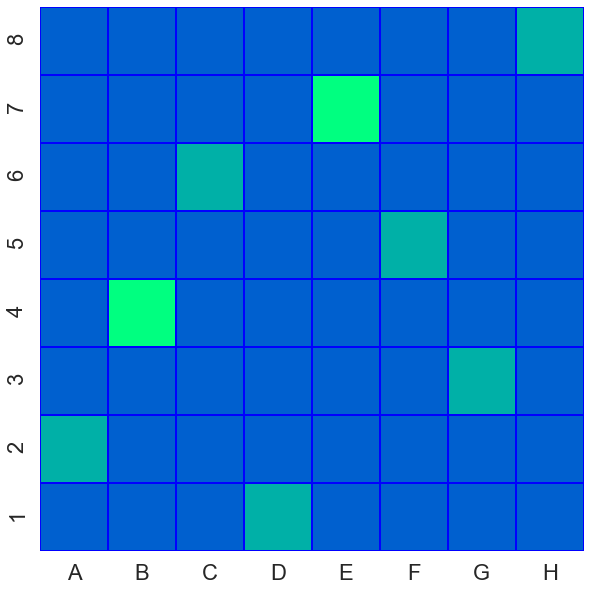

In [369]:
plot_best_state(best_state)

In [389]:
problem = mlrose.DiscreteOpt(length = 90, fitness_fn = fitness, maximize = True, max_val = 90)

In [396]:
# Solve problem using MIMIC
start = time.time()
best_state, best_fitness, fitness_curve = mlrose.mimic(problem, pop_size = 9000, keep_pct = .2,
                                                        max_attempts = 10, max_iters = 1000,
                                                        random_state = 12,
                                                        curve=True)
end = time.time()
print('Elapsed Time: {} s'.format(end-start))

print(best_state)
print(best_fitness)

Elapsed Time: 4098.825719833374 s
[54 82 34 28 18 73 17 65 74 37 77 89 55 52 62 65 94 45 81 52 73 96 84 33
 80 25 49 42  5 35  5  2 26 20 64 99  8 84 67 91 26 86 97 85  7 83 70 27
 75 93 69 92 16 41 61 36 91 56 15 72  3 92 45 48 25 87 31 59 94 19 59 21
 12  4 43 58 38 78 98 69 61 40 30 76  6 47 68 53 93 60 28 75  3 32 24 29
  0 76 13 57]
4918.0


In [397]:
# Define decay schedule
schedule = mlrose.ExpDecay()

# Solve problem using simulated annealing
start = time.time()
best_state, best_fitness, fitness_curve = mlrose.simulated_annealing(problem, schedule = schedule,
                                                      max_attempts = 10, max_iters = 1000,
                                                      random_state = 7,
                                                      curve=True)
end = time.time()
print('Elapsed Time: {} s'.format(end-start))

print(best_state)
print(best_fitness)

Elapsed Time: 4.597565412521362 s
[73 12 39 25 47 54 37 98 22 36  8 65 50 85 17 11 66 72 10 24  0 90 30  3
 15 41 91 63  4 78 81 55 39 95 96 34 42 87 91 57  2 97 46 58 13 89 56 53
 38 32 14 93 93 88 38 72 23 27 35 64 61  7 59 29  1 90 94 97 45 28 96 20
 44 92 19 33 52 62 57 74 35 31  1 40 30 98 83 62 75  6 47 84 80 17  9 76
 71 60 49 53]
4911.0


In [398]:
# Solve problem using random hill climb
start = time.time()
best_state, best_fitness, fitness_curve = mlrose.random_hill_climb(problem, restarts = 8,
                                                                  max_attempts = 10, max_iters = 1000,
                                                                  random_state = 42,
                                                                  curve=True)
end = time.time()
print('Elapsed Time: {} s'.format(end-start))

print(best_state)
print(best_fitness)

Elapsed Time: 7.575653076171875 s
[ 4 61 68 75 15 89 89 47 49 38 99 32 93 22 31 69  6 96 51 56 70 18 57 95
 52 68  3  7 23 79  1 91 84 90 83 23 38  5  0 32 32 60 50 42 11 66 20 61
 13 73 37 83 28  2  5 94 45 39 34 86 80 64  7 92 25 77 89 33  6 67 27 74
  0 58 17  8 35  9 72 85 63 98 48 98 53 81 56  1 44 18 95 62 11 54 12 67
 87 81 29 16]
4904.0


In [399]:
# Solve problem using Genetic Algorithm
start = time.time()
best_state, best_fitness, fitness_curve = mlrose.genetic_alg(problem, pop_size = 9000, mutation_prob=0.1,
                                                        max_attempts = 10, max_iters = 1000,
                                                        random_state = 42,
                                                        curve=True)
end = time.time()
print('Elapsed Time: {} s'.format(end-start))

print(best_state)
print(best_fitness)

Elapsed Time: 1107.1590194702148 s
[67 59 95  1 47 68 27 51 70 60 44  6  6 20 38 58 53 45 66 95 69 34 23 96
 96 54  8 64  7 11 99 29 51 39 83 89  5 85 46 79 18 25 30 39 21 43 16 91
  3 84 75 31  4 79 83  0 60 80 28  1 72 75 92 88 49  9 77 83 22 25  0 26
 90 14 55 23 16 32 17 29 43 38 53 32  9 56 13 90 46 74  1 65 12 43 40 61
 14 76 57 26]
4877.0
